<a href="https://colab.research.google.com/github/Pongpang-2102/Data-Science-Project-2022/blob/main/Puriwat_RDD_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework1 - Student Examination Data Analysis

ลำดับขั้นตอนการทำงาน เป็นไปดังต่อไปนี้

1. ติดตั้ง PySpark โดยใช้คำสั่ง !pip install pyspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 49 kB/s 
     |████████████████████████████████| 199 kB 47.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=4cb0bdc757561eba2700f9ed4c207e7489f28b4074bb2692be3d6934ce19b376
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


2. นำไฟล์ `rdd_problem.csv` ไปใส่ใน Google Drive และเชื่อมต่อ Jupyter Notebook เข้ำกับ Google Drive

2.1 ทำตามลำดับขั้นตอนตามภาพด้านล่าง


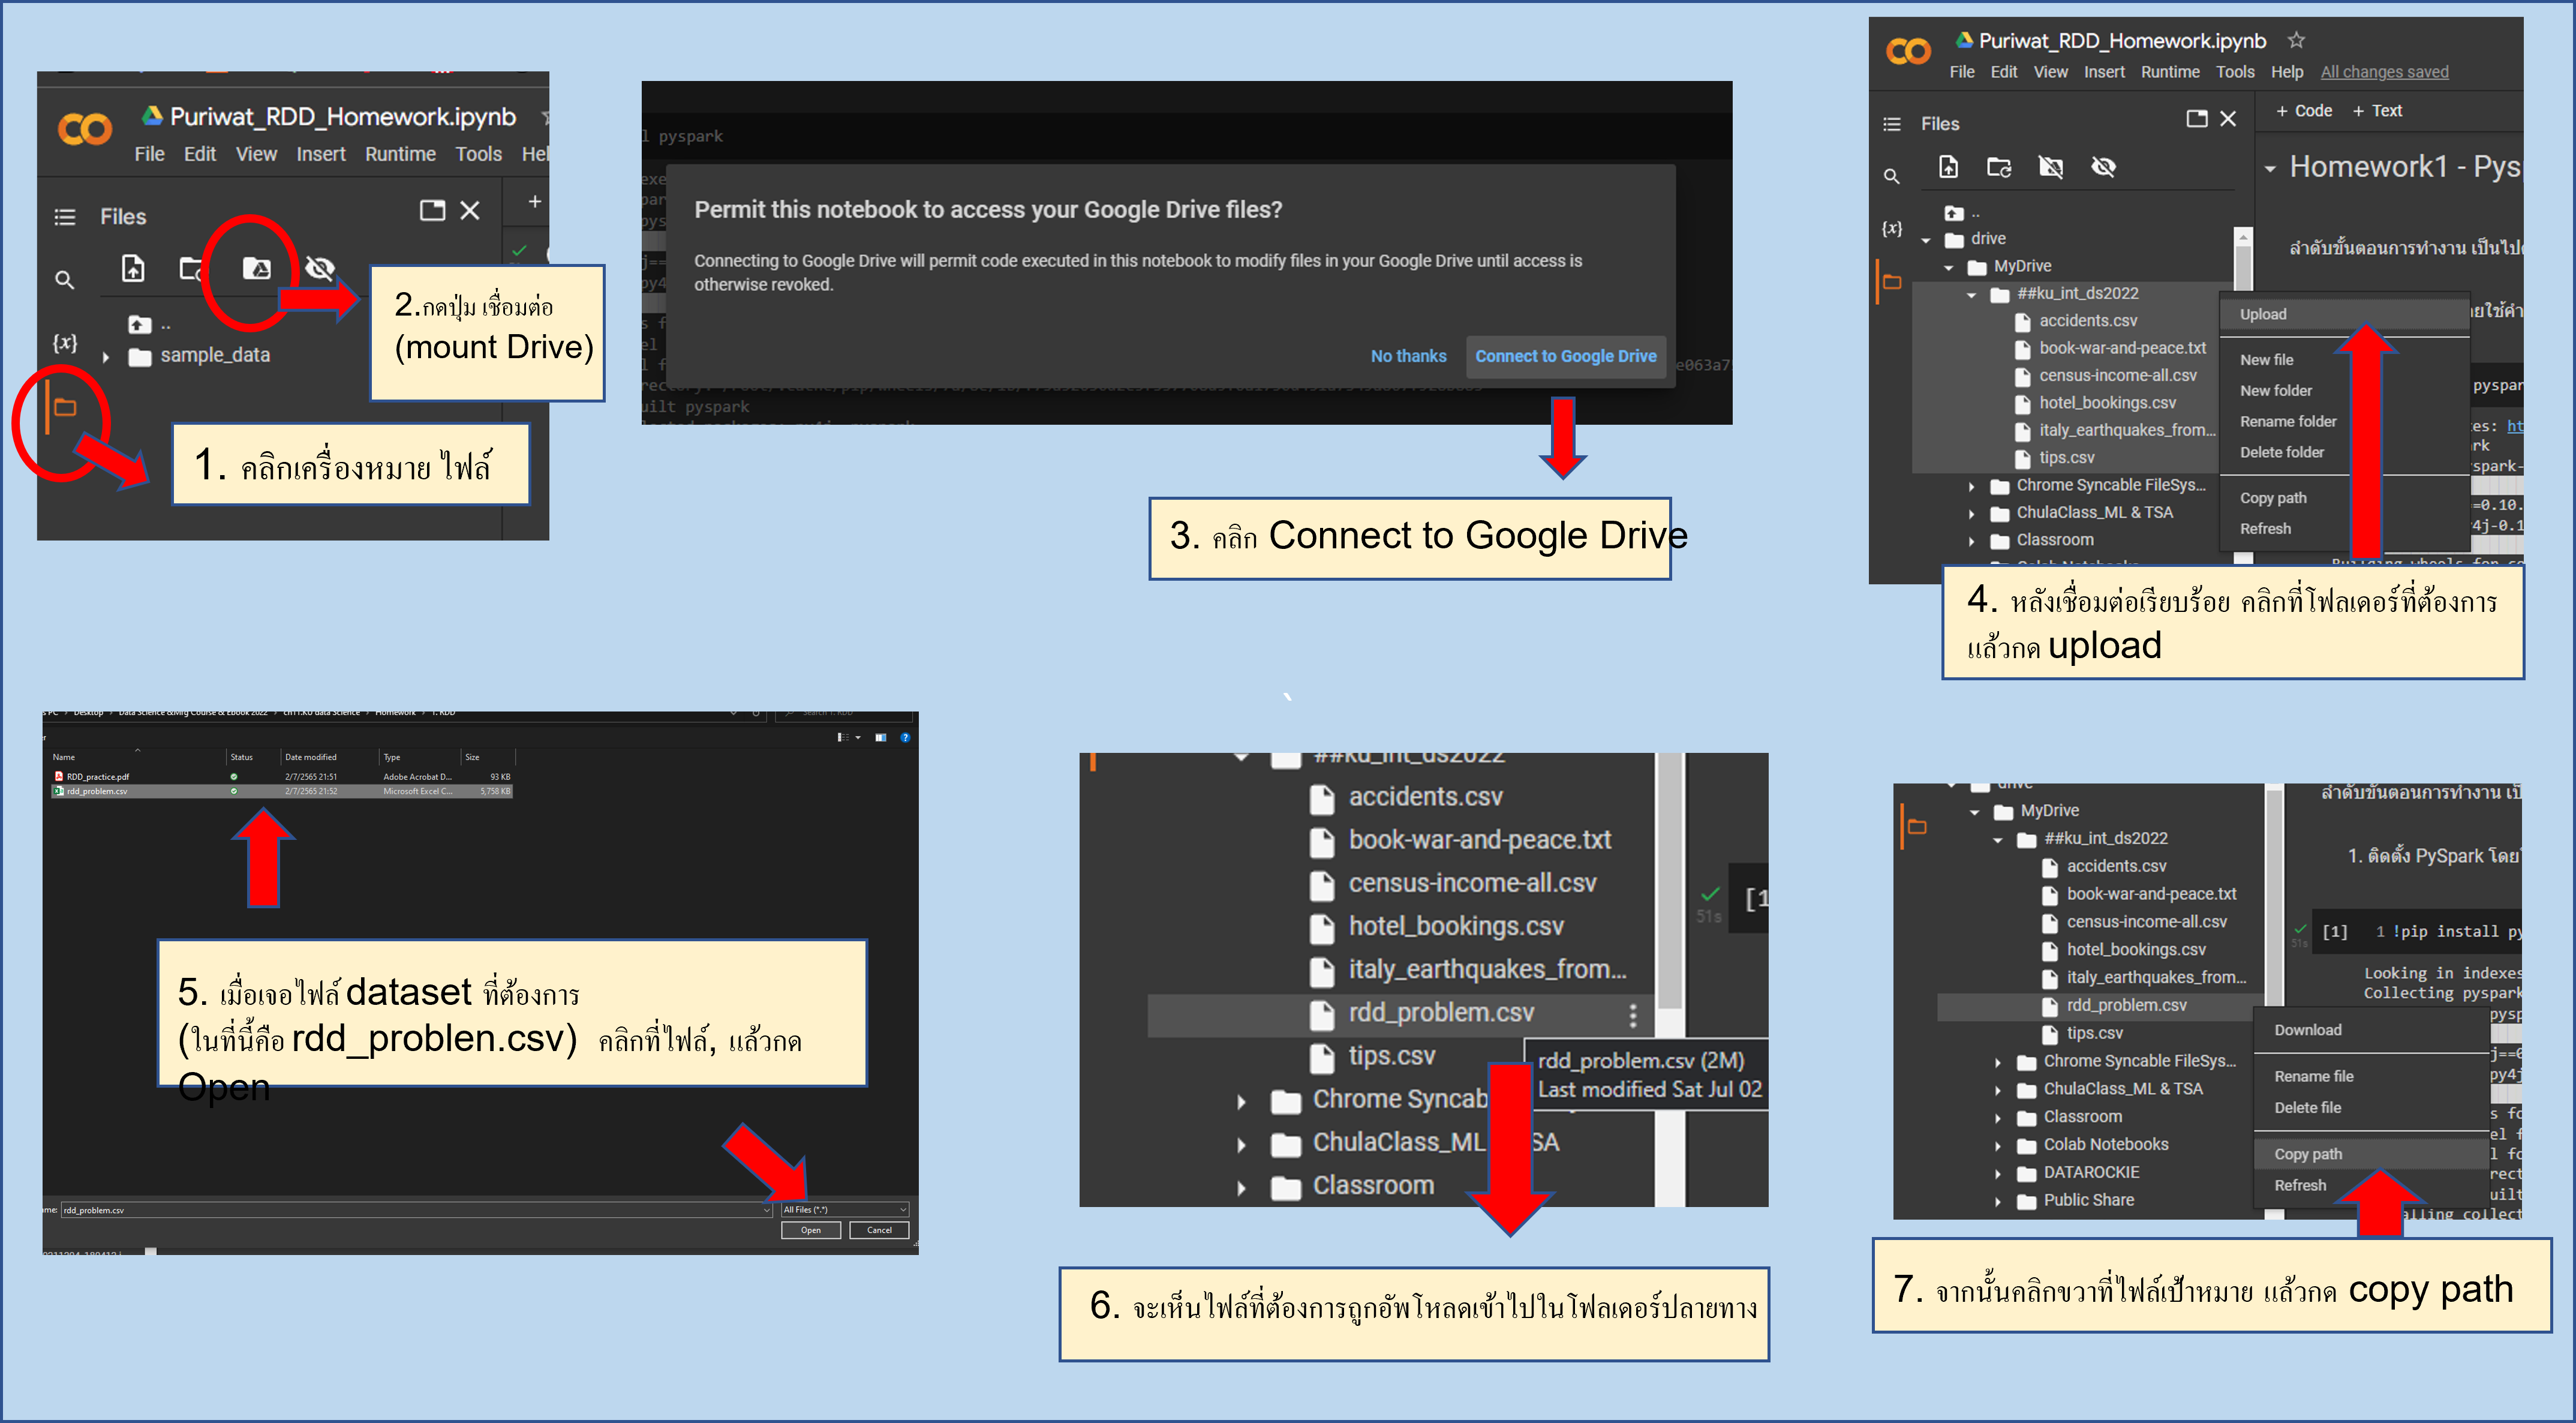

2.2 จากนั้นเชื่อมต่อไฟล์เข้ากับ google drive

In [ ]:
# start with Importing spark session
from pyspark.sql import SparkSession


In [ ]:
# assigning File_path # from step 7 : above
file_path = '/content/drive/MyDrive/##ku_int_ds2022/rdd_problem.csv'

3. สร้ำง SparkSession และ SparkContext

In [ ]:
# 3.1 creating SparSession
spark = SparkSession.builder.appName('Puriwat_RDD_Homework').getOrCreate()

In [ ]:
# 3.2 creating SparkContext to extract information
spark.sparkContext.textFile(file_path)

/content/drive/MyDrive/##ku_int_ds2022/rdd_problem.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

4. สร้ำง RDD จำกไฟล์ rdd_problem.csv ไฟล์นี้มีจำนวน 500,000 แถว โดยแต่ละแถวเก็บคะแนนสอบของนักเรียนแต่ละกลุ่ม หนึ่งแถวมีข้อมูล 3 ตัวคือรหัสนักเรียน กลุ่มเรียน และโดยมี comma (,) คั่นระหว่ำงข้อมูล


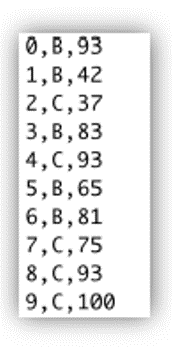


In [ ]:
# store data in 3.2 to an object variable --> student_exam_score_rdd
student_exam_info_rdd = spark.sparkContext.textFile(file_path)

In [ ]:
# show example of data for first 20 records
student_exam_info_rdd.take(9)

['0,B,93',
 '1,B,42',
 '2,C,37',
 '3,B,83',
 '4,C,93',
 '5,B,65',
 '6,B,81',
 '7,C,75',
 '8,C,93']

In [ ]:
# use flatmap tp flatten our data (No sub-list / no sub-tuple  )
student_exam_splitted = student_exam_info_rdd.\
                                    flatMap(lambda line:line.split(',')).\
                                    cache()

In [ ]:
student_exam_info_rdd.take(101)[:][100]  # try to view data from row index = 100

'100,C,67'

In [ ]:
student_exam_splitted.take(10)

['0', 'B', '93', '1', 'B', '42', '2', 'C', '37', '3']

5. เขียนโปรแกรมตอบคำถำมต่อไปนี้
    - a. นับจำนวนนักเรียนที่ได้คะแนนเต็ม (100)
    - b. นับจำนวนนักเรียนในแต่ละกลุ่ม
    - c. คิดค่ำเฉลี่ยของคะแนนในแต่ละกลุ่ม

 - a. นับจำนวนนักเรียนที่ได้คะแนนเต็ม (100)

In [ ]:
# ensure that total records is 500,000
student_exam_splitted.count()

1500000

In [ ]:
# create an accumulator for store student with score = 100 
# and store value at variable : student_score_100
accum_student_score100  = spark.sparkContext.accumulator(0)

In [ ]:
# define a function to assist solving this problem
def add_student_score_100 (student_exam_splitted):
  if student_exam_splitted == '100' :
    accum_student_score100.add(1)

In [ ]:
# use foreach to run all value from list
student_exam_splitted.foreach(add_student_score_100)

In [ ]:
# to view the value of : all_students_score_100 
total_100 = accum_student_score100.value - 1  # deduct student ID = 100
print("the total number of students with score = 100 are ",total_100,"people")

the total number of students with score = 100 are  7079 people


- b. นับจำนวนนักเรียนในแต่ละกลุ่ม

In [ ]:
# to find that A have = ..... students , B , C in the same way


In [ ]:
accum_students_group_A  = spark.sparkContext.accumulator(0)
accum_students_group_B  = spark.sparkContext.accumulator(0)
accum_students_group_C  = spark.sparkContext.accumulator(0)
accum_students_group_other  = spark.sparkContext.accumulator(0)

In [ ]:
def add_student_to_group (student_exam_splitted):
    if student_exam_splitted == 'A' :
        accum_students_group_A.add(1)
    elif student_exam_splitted == 'B' :
        accum_students_group_B.add(1)
    elif student_exam_splitted == 'C':
        accum_students_group_C.add(1)
    



In [ ]:
student_exam_splitted.foreach(add_student_to_group)

In [ ]:
accum_students_group_A.value
accum_students_group_B.value
accum_students_group_C.value
print("The student in each group as data below","\n"
       "Group A : ",accum_students_group_A.value,"students \n"    #A 199,992 students
       "Group B : ",accum_students_group_B.value,"students \n"    #B 174,806 students
      "Group C : ",accum_students_group_C.value,"students"        #C 125,202 students
       )

The student in each group as data below 
Group A :  199992 students 
Group B :  174806 students 
Group C :  125202 students


หรืออาจใช้วิธีที่สั้นลง  แต่ได้คำตอบเท่ากัน ดังต่อไปนี้

In [ ]:
# 1. Create a map to split info
student_exam_splitted_lol = student_exam_info_rdd.\
                                    map(lambda line:line.split(',')).\
                                    cache()  

In [ ]:
# 2. show the splitted result as list of list
student_exam_splitted_lol.take(10)

[['0', 'B', '93'],
 ['1', 'B', '42'],
 ['2', 'C', '37'],
 ['3', 'B', '83'],
 ['4', 'C', '93'],
 ['5', 'B', '65'],
 ['6', 'B', '81'],
 ['7', 'C', '75'],
 ['8', 'C', '93'],
 ['9', 'C', '100']]

In [ ]:
# 3. count the group_cdoe by using key-value pair method 
     # by collect only group_code (A,B,C) and store it in object student_splitted_lol_subgroup_addone :
     # if group code was found --> add +1
student_splitted_lol_subgroup_addone = student_exam_splitted_lol.\
                                                map(lambda x:(x[1],1    ))   

In [ ]:
student_splitted_lol_subgroup_addone.take(10)

[('B', 1),
 ('B', 1),
 ('C', 1),
 ('B', 1),
 ('C', 1),
 ('B', 1),
 ('B', 1),
 ('C', 1),
 ('C', 1),
 ('C', 1)]

In [ ]:
# 4. after key-value pair are being created -->we can use map &groupbyKey() as below
student_splitted_lol_subgroup = student_splitted_lol_subgroup_addone.groupByKey()

In [ ]:
# 5. split it to individual group (A,B,C)
student_splitted_lol_subgroup.\
        sortByKey(ascending = True).take(3)

[('A', <pyspark.resultiterable.ResultIterable at 0x7f1b3f576b50>),
 ('B', <pyspark.resultiterable.ResultIterable at 0x7f1b3f576d90>),
 ('C', <pyspark.resultiterable.ResultIterable at 0x7f1b3f576310>)]

In [ ]:
# show the accumulated value of each individual group (A,B or C)
student_splitted_lol_subgroup.\
                             sortByKey(ascending = True).\
                             map(lambda x:(x[1],sum(x[1])    )).\
                             take(3)

# the accumulated data for each group will be shown in the same value 
# with our previous calculation as be told

[(<pyspark.resultiterable.ResultIterable at 0x7f1b3f5a4ed0>, 199992),
 (<pyspark.resultiterable.ResultIterable at 0x7f1b3f5a18d0>, 174806),
 (<pyspark.resultiterable.ResultIterable at 0x7f1b407a69d0>, 125202)]

- c. คิดค่ำเฉลี่ยของคะแนนในแต่ละกลุ่ม

In [ ]:
# to summarize statistics using : agg()

# 1. starting with  import function as F
import pyspark.sql.functions as F 

In [ ]:
# 2. to create a schema for our file which will be uploaded
schema = "student_ID STRING, student_group STRING, exam_score INT"

In [ ]:
# 3. create a dataframe named : student_df
student_df = spark.read.csv('/content/drive/MyDrive/##ku_int_ds2022/rdd_problem.csv', 
                            header = True , schema= schema)

In [ ]:
# 4. to view partially for student_df
student_df.show()

+----------+-------------+----------+
|student_ID|student_group|exam_score|
+----------+-------------+----------+
|         1|            B|        42|
|         2|            C|        37|
|         3|            B|        83|
|         4|            C|        93|
|         5|            B|        65|
|         6|            B|        81|
|         7|            C|        75|
|         8|            C|        93|
|         9|            C|       100|
|        10|            B|        31|
|        11|            A|        54|
|        12|            C|        30|
|        13|            B|        53|
|        14|            C|        38|
|        15|            C|        59|
|        16|            B|        83|
|        17|            A|        39|
|        18|            A|        63|
|        19|            C|        97|
|        20|            B|        66|
+----------+-------------+----------+
only showing top 20 rows



In [ ]:
# 5. to calculate mean from each student group (A,b or C) 

student_df.groupby('student_group').\
           agg(F.mean(  student_df.exam_score).alias('Average_Exam_score')   ).\
           sort('student_group',ascending = True) .show()

+-------------+------------------+
|student_group|Average_Exam_score|
+-------------+------------------+
|            A| 65.00201008040321|
|            B| 65.00358685392294|
|            C| 64.84568936598457|
+-------------+------------------+



In [ ]:
# Additional it also can show the number of student in each group
# (previous exercise) using sql-assisted as well

# to find aggregated value from splitted group using : groupby()
student_df.groupby('student_group').\
           count().sort('count',ascending = False).show(3)

+-------------+------+
|student_group| count|
+-------------+------+
|            A|199992|
|            B|174805|
|            C|125202|
+-------------+------+

